<a href="https://colab.research.google.com/github/naavveen/logistic_regression_anylasis/blob/main/logistic_regression_anylasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
files.upload()

Saving personality_datasert.csv to personality_datasert.csv


{'personality_datasert.csv': b'Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality\n4.0,No,4.0,6.0,No,13.0,5.0,Extrovert\n9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert\n9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert\n0.0,No,6.0,7.0,No,14.0,8.0,Extrovert\n3.0,No,9.0,4.0,No,8.0,5.0,Extrovert\n1.0,No,7.0,5.0,No,6.0,6.0,Extrovert\n4.0,No,9.0,3.0,No,7.0,7.0,Extrovert\n2.0,No,8.0,4.0,No,7.0,8.0,Extrovert\n10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert\n0.0,No,8.0,6.0,No,13.0,8.0,Extrovert\n3.0,No,9.0,6.0,No,15.0,5.0,Extrovert\n10.0,Yes,3.0,1.0,Yes,4.0,0.0,Introvert\n3.0,No,6.0,7.0,No,14.0,10.0,Extrovert\n3.0,No,6.0,4.0,No,10.0,7.0,Extrovert\n6.0,Yes,3.0,0.0,Yes,1.0,3.0,Introvert\n0.0,No,4.0,4.0,No,8.0,8.0,Extrovert\n9.0,Yes,0.0,0.0,Yes,0.0,0.0,Introvert\n1.0,No,5.0,6.0,No,10.0,4.0,Extrovert\n5.0,Yes,3.0,0.0,Yes,4.0,2.0,Introvert\n1.0,No,7.0,5.0,No,12.0,5.0,Extrovert\n10.0,Yes,3.0,1.0,Yes,2.0,1.0,Introvert\n2.0,No,8.0,4.0,No,13.0,6

In [ ]:
data=pd.read_csv('personality_datasert.csv')
# Display basic information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Define numeric and categorical columns
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_columns = ['Stage_fear', 'Drained_after_socializing']
target_column = 'Personality'

# Verify categorical values
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts(dropna=False))

# Convert numeric columns to numeric, coercing errors
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Dataset Shape: (2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Missing Values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
P

In [ ]:
data[numeric_columns].corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.718139,-0.735247,-0.701665,-0.718072
Social_event_attendance,-0.718139,1.000000,0.731941,0.718518,0.727732
Going_outside,-0.735247,0.731941,1.000000,0.718327,0.754758
Friends_circle_size,-0.701665,0.718518,0.718327,1.000000,0.690381
Post_frequency,-0.718072,0.727732,0.754758,0.690381,1.000000


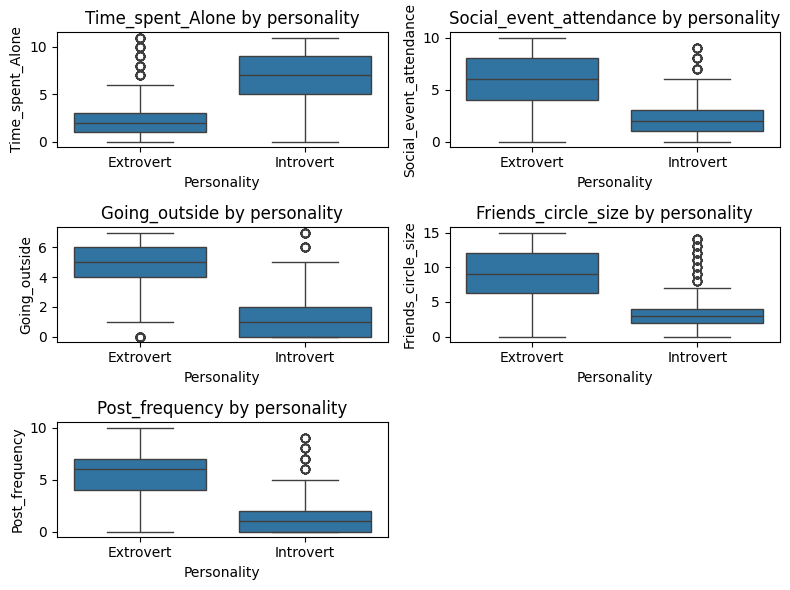

In [ ]:
plt.figure(figsize=(8,6))
for i ,col in enumerate(numeric_columns,1):
    plt.subplot(3,2,i)
    sns.boxplot(x=target_column,y=col,data=data)
    plt.title(f'{col} by personality')
plt.tight_layout()
plt.show()

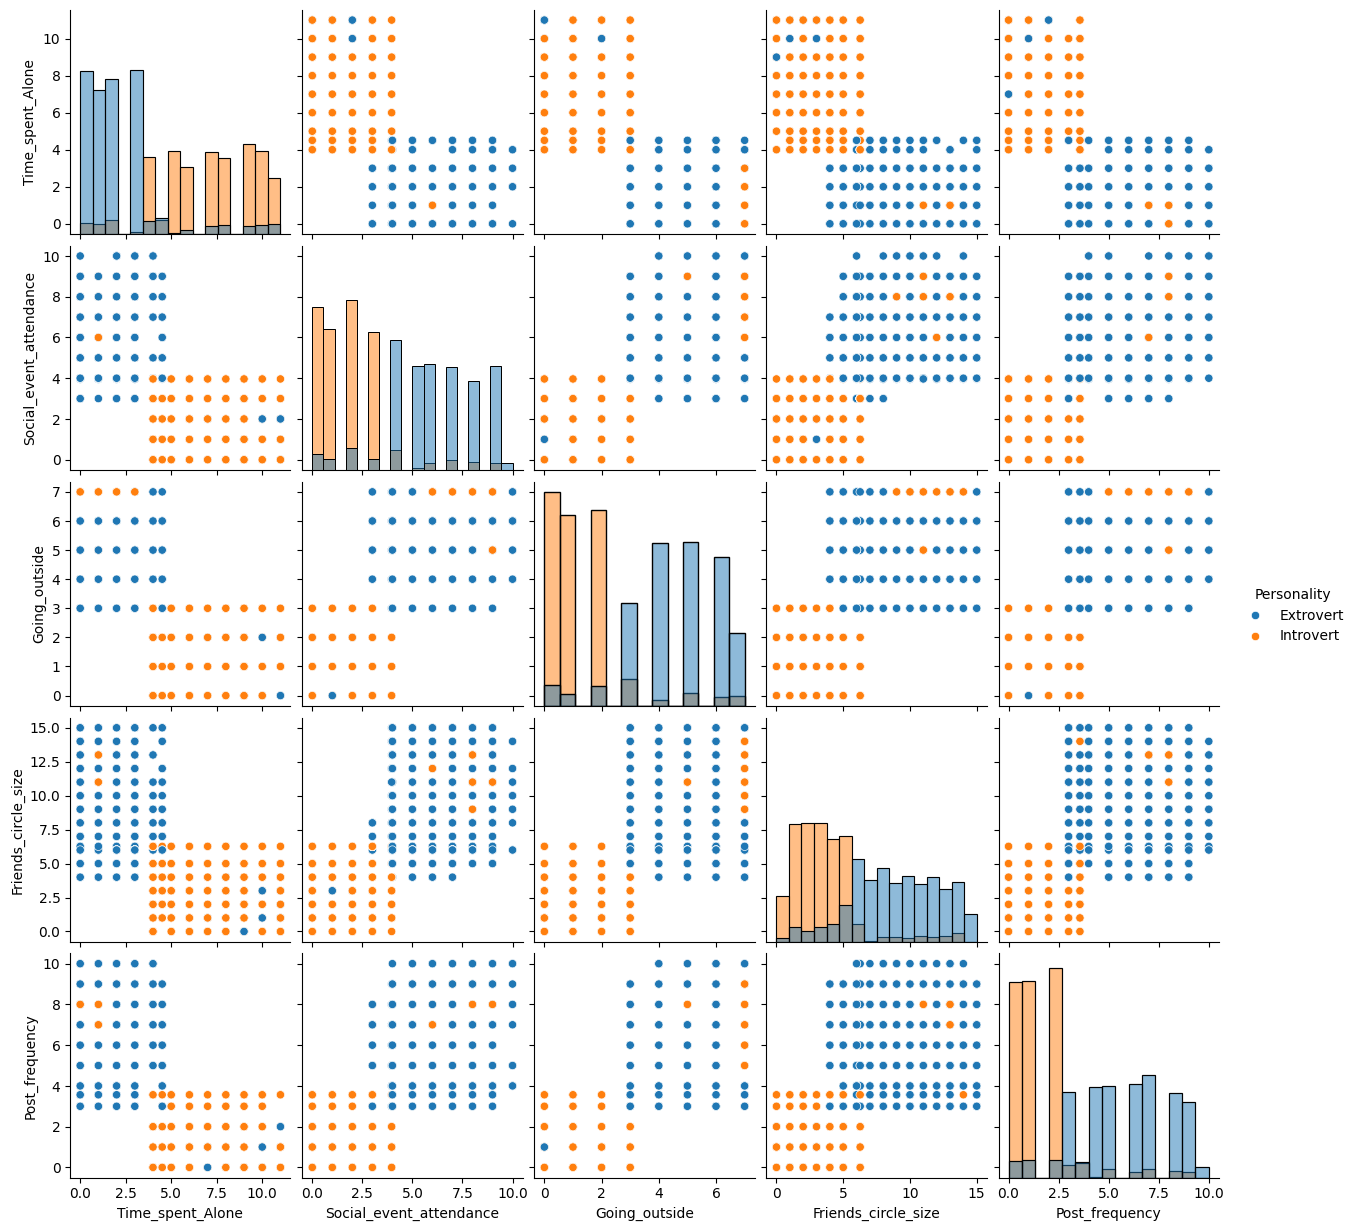

In [ ]:
sns.pairplot(data[numeric_columns + [target_column]], hue=target_column,diag_kind='hist')
plt.show()

In [ ]:
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])
print(f"Encoded classes: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Handle missing values
# Numeric features: impute with median
numeric_imputer = SimpleImputer(strategy='median')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# Categorical features: impute with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Update feature list
encoded_columns = [col for col in data.columns if col != target_column]

# Cap outliers instead of removing
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

Encoded classes: {'Extrovert': np.int64(0), 'Introvert': np.int64(1)}


In [ ]:
x=data.drop(columns=target_column)
y=data[target_column]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)

In [ ]:
# Re-run train/test split, SMOTE, feature engineering, and scaling
# This is necessary because the data was modified in the previous step to handle numeric column issues.

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Ensure column names are preserved after SMOTE
X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = y_train_resampled

# Impute missing values in original numeric columns after SMOTE
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
numeric_imputer = SimpleImputer(strategy='median')
X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = numeric_imputer.transform(X_test[numeric_columns])

# Feature Engineering (from cell 84zA-BUL35iu)
X_train['Alone_to_Social_Ratio'] = X_train['Time_spent_Alone'] / (X_train['Social_event_attendance'] + 1)
X_test['Alone_to_Social_Ratio'] = X_test['Time_spent_Alone'] / (X_test['Social_event_attendance'] + 1)
X_train['Social_Comfort_Index'] = (X_train['Friends_circle_size'] + X_train['Post_frequency'] - X_train['Stage_fear_Yes']) / 3
X_test['Social_Comfort_Index'] = (X_test['Friends_circle_size'] + X_test['Post_frequency'] - X_test['Stage_fear_Yes']) / 3
X_train['Social_Overload'] = X_train['Drained_after_socializing_Yes'] * X_train['Social_event_attendance']
X_test['Social_Overload'] = X_test['Drained_after_socializing_Yes'] * X_test['Social_event_attendance']

# Impute missing values in engineered features before creating polynomial features
engineered_features = ['Alone_to_Social_Ratio', 'Social_Comfort_Index', 'Social_Overload']
for col in engineered_features:
    for df in [X_train, X_test]:
        if col in df.columns:
            df[col] = df[col].replace([np.inf, -np.inf], np.nan) # Replace inf with NaN for imputation
            imputer = SimpleImputer(strategy='median') # Use median for robustness to outliers
            df[col] = imputer.fit_transform(df[[col]])

# Polynomial features (from cell 84zA-BUL35iu)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features_train = poly.fit_transform(X_train[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']])
poly_features_test = poly.transform(X_test[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']])
poly_feature_names = poly.get_feature_names_out(['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size'])

# Remove original feature names from poly_feature_names
original_features_poly = ['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']
poly_feature_names = [name for name in poly_feature_names if name not in original_features_poly]

# Add polynomial features to the DataFrames
X_train[poly_feature_names] = poly_features_train[:, [poly.get_feature_names_out().tolist().index(name) for name in poly_feature_names]]
X_test[poly_feature_names] = poly_features_test[:, [poly.get_feature_names_out().tolist().index(name) for name in poly_feature_names]]

# Binning (from cell alWmnlaqqHWE)
X_train['Time_spent_Alone_Binned'] = pd.qcut(X_train['Time_spent_Alone'], q=3, labels=['Low', 'Medium', 'High'])
X_test['Time_spent_Alone_Binned'] = pd.qcut(X_test['Time_spent_Alone'], q=3, labels=['Low', 'Medium', 'High'])
X_train = pd.get_dummies(X_train, columns=['Time_spent_Alone_Binned'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Time_spent_Alone_Binned'], drop_first=True)

# Apply scaling after feature engineering (from cell alWmnlaqqHWE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

Scaled X_train shape: (2386, 15)
Scaled X_test shape: (580, 15)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred =model.predict(X_test_scaled)


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))
sensitivity = confusion_matrix(Y_test, y_pred)[0, 0] / (confusion_matrix(Y_test, y_pred)[0, 0] + confusion_matrix(Y_test, y_pred)[0, 1])
print(f"Sensitivity (True Positive Rate): {sensitivity}")
accuracy = np.mean(y_pred == Y_test)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[267  31]
 [ 23 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       298
           1       0.89      0.92      0.91       282

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580

Sensitivity (True Positive Rate): 0.8959731543624161
Accuracy: 0.91
